# Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Enter relevant column numbers
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[: , [2,3]].values
y = data.iloc[: , -1].values

In [3]:
data.EstimatedSalary.mean()

69742.5

In [4]:
# Split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [5]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# Fitting model to the train set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',
                random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [7]:
pd.DataFrame({'act' : y_test, 'pred' : y_pred}).head()

,act,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [8]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,63,5
1,7,25


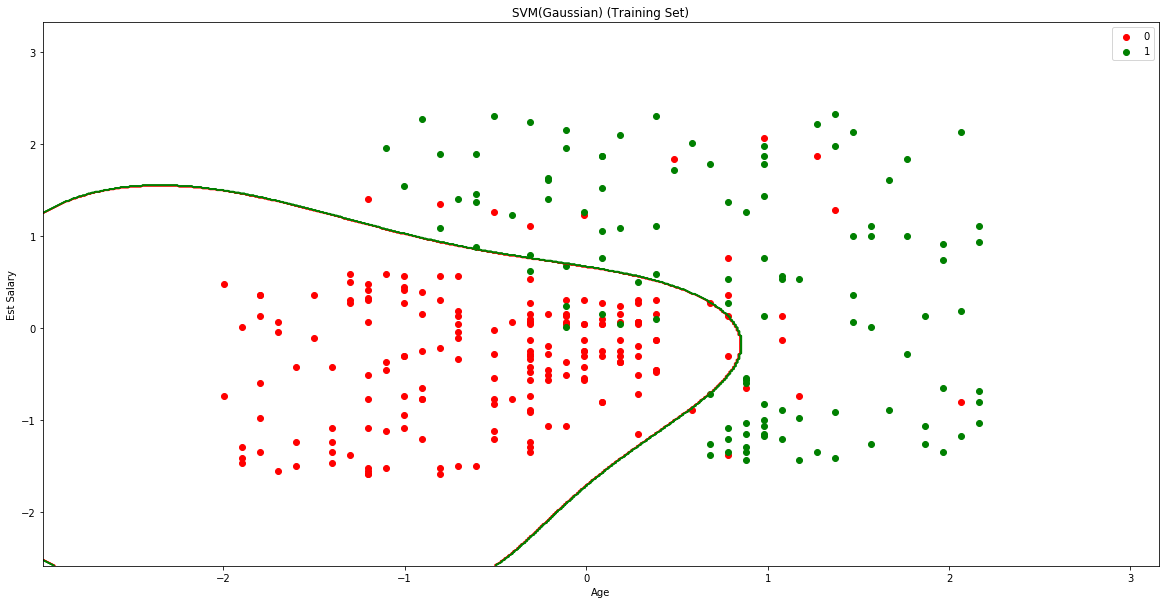

In [82]:
#Visualizing the Logistic Regression training test results
classifier = SVC(kernel = 'rbf',
                random_state = 0,gamma=.5)
classifier.fit(X_train, y_train)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.figure(figsize = [20,10])
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM(Gaussian) (Training Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()

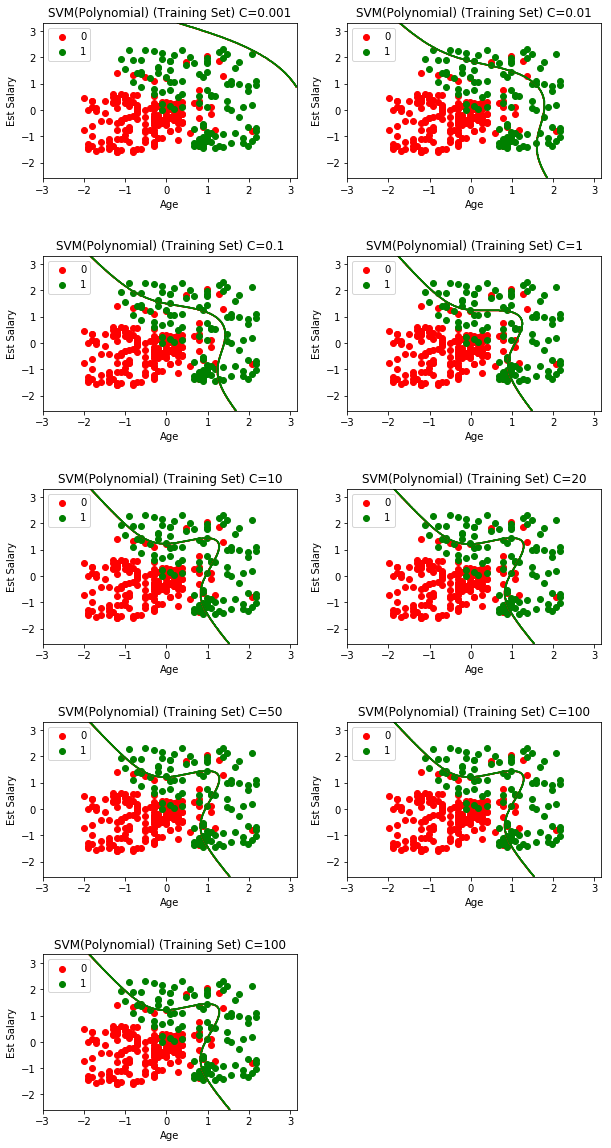

In [90]:
#Visualizing the SVM training test results
f = plt.figure(figsize=(10,20))
h = 1
plt.subplots_adjust(hspace=.5)
for C in [.001,.01,.1,1,10,20,50,100,100]:
    classifier = SVC(kernel = 'poly',
                    random_state = 0, gamma=0.5,degree=3, C=C)
    classifier.fit(X_train, y_train)
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                          np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
    
    f.add_subplot(5,2,h)
    plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 1, cmap = ListedColormap(('red','green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
                   c = ListedColormap(('red','green'))(i), label = j)
    plt.title('SVM(Polynomial) (Training Set) C={}'.format(C))
    plt.xlabel('Age')
    plt.ylabel('Est Salary')
    plt.legend()
    h +=1
    
plt.show()

In [87]:
data.EstimatedSalary.mean()

69742.5

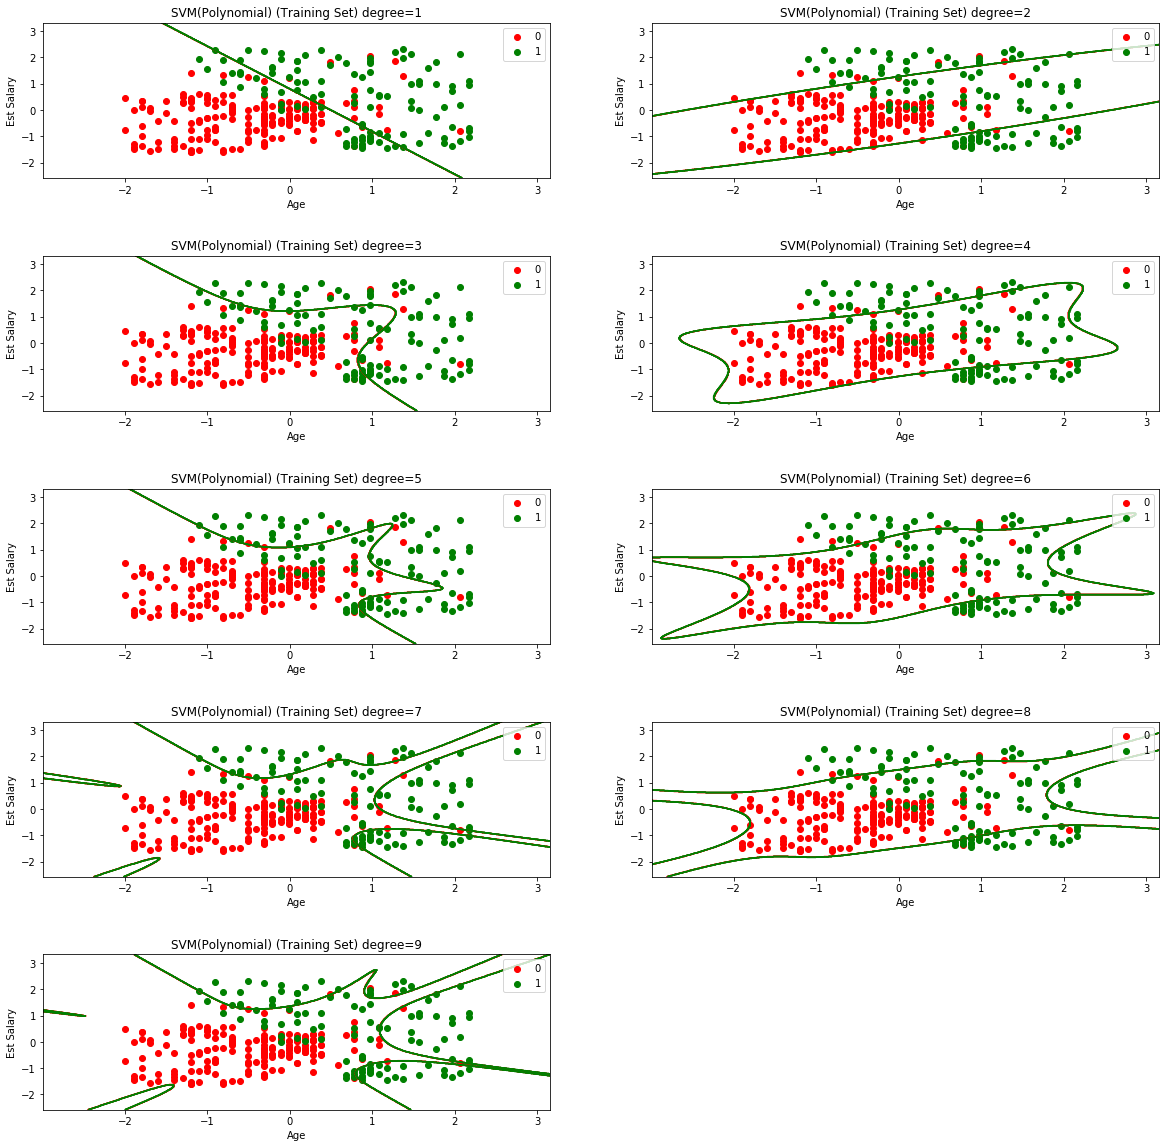

In [62]:
#Visualizing the Kernel(poly) SVM training test results
f = plt.figure(figsize=(20,20))
h = 1
plt.subplots_adjust(hspace=.5)
for a in [1,2,3,4,5,6,7,8,9]:
    classifier = SVC(C=100, kernel = 'poly',degree=a,
                    random_state = 0, class_weight={0:1, 1:1})
    classifier.fit(X_train, y_train)
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                          np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
    f.add_subplot(5,2,h)
    plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 1, cmap = ListedColormap(('red','green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
                   c = ListedColormap(('red','green'))(i), label = j)
    plt.title('SVM(Polynomial) (Training Set) degree={}'.format(a))
    plt.xlabel('Age')
    plt.ylabel('Est Salary')
    plt.legend()
    h +=1
plt.show()

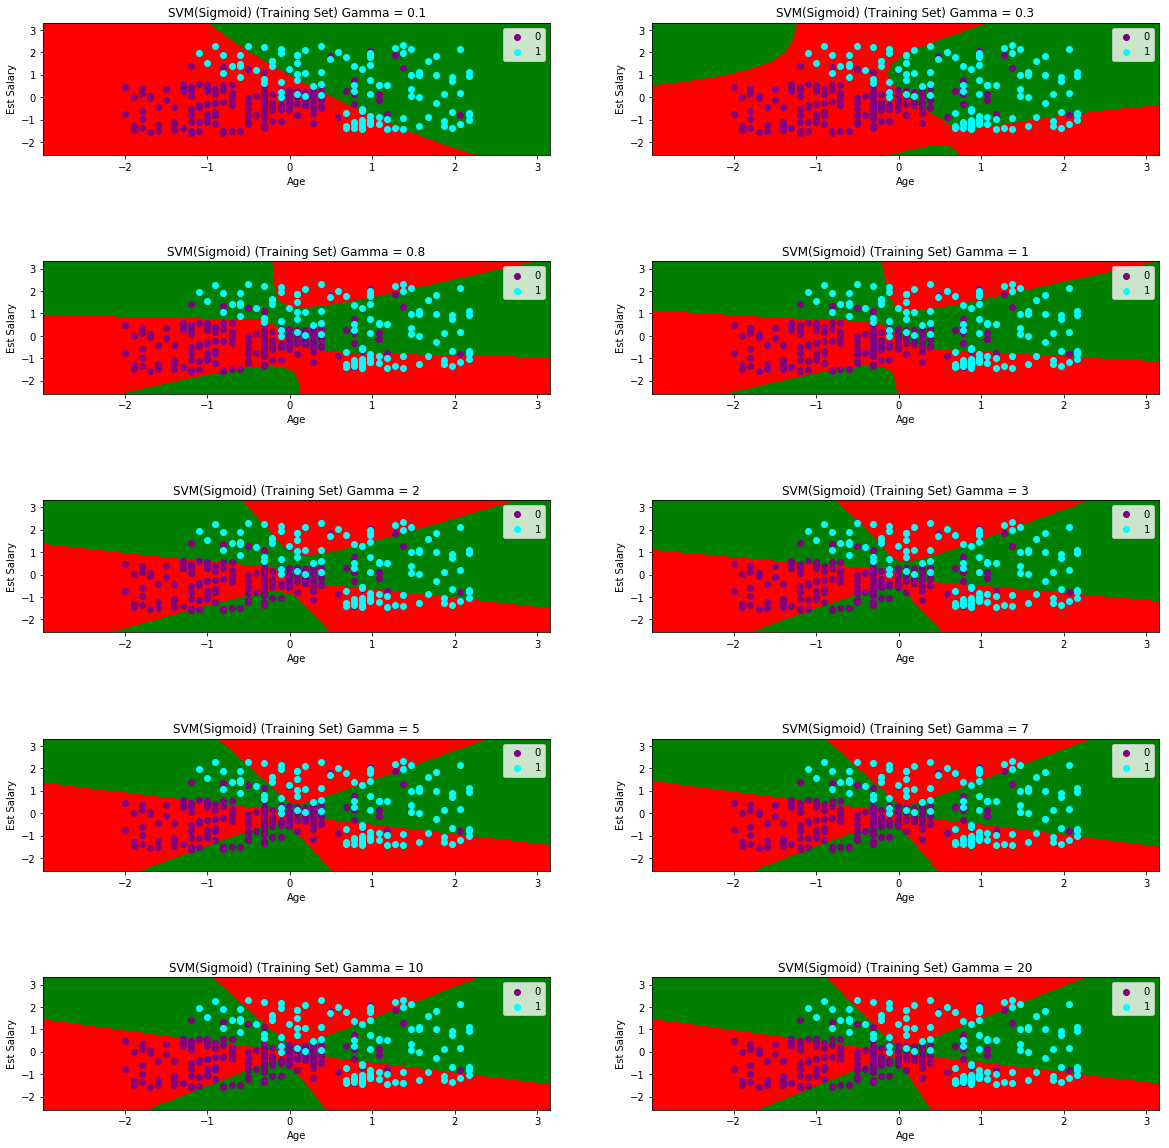

In [65]:
#Visualizing the Kernel(sigmoid) SVM training test results
h = 1
f = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.8)
for G in [.1,.3,.8,1,2,3,5,7,10,20]:
    classifier = SVC(kernel = 'sigmoid',
                    random_state = 0, gamma = G)
    classifier.fit(X_train, y_train)
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                          np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
    f.add_subplot(5,2,h)
    plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 1, cmap = ListedColormap(('red','green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
                   c = ListedColormap(('purple','cyan'))(i), label = j)
    plt.title('SVM(Sigmoid) (Training Set) Gamma = {}'.format(G))
    plt.xlabel('Age')
    plt.ylabel('Est Salary')
    plt.legend()
    h += 1
plt.show()

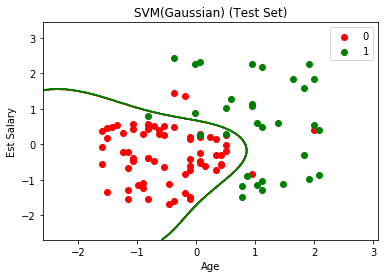

In [12]:
#Visualizing the Kernel(rbf) SVM test set results
classifier = SVC(kernel = 'rbf',
                random_state = 0)
classifier.fit(X_train, y_train)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01), #returns coordinate matrices
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM(Gaussian) (Test Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()

In [4]:
!pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/83/a1/a39be1675a62597e4c0d4fdaeb65b14752b8aa8afc92e90edd91614353ab/fbprophet-0.3.post2.tar.gz
  Running setup.py bdist_wheel for fbprophet: started
  Running setup.py bdist_wheel for fbprophet: finished with status 'error'
  Complete output from command c:\users\berk_\appdata\local\programs\python\python36\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\berk_\\AppData\\Local\\Temp\\pip-install-ycrr837k\\fbprophet\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\berk_\AppData\Local\Temp\pip-wheel-2lm7fr3z --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_db8febf10f23d7fa27a62fbcfd7f17b2 NOW.
  error: Microsoft

  Failed building wheel for fbprophet
Command "c:\users\berk_\appdata\local\programs\python\python36\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\berk_\\AppData\\Local\\Temp\\pip-install-ycrr837k\\fbprophet\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\berk_\AppData\Local\Temp\pip-record-04o0218r\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\berk_\AppData\Local\Temp\pip-install-ycrr837k\fbprophet\


In [2]:
!pip install pystan

In [3]:
!pip install wheel